# Regression Plots


<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *p*andas](#1)<br>
2.  [Visualizing Data using Matplotlib](#2) <br>
3.  [Regression Plots](#3) <br>

</div>


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
df = pd.read_excel('datasets/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [ ]:
# print the dimensions of the dataframe
print(df.shape)

### Clean up data.

In [15]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['Type','Coverage','AREA','REG','DEV'], 
        axis = 1, 
        inplace = True
       )



KeyError: "['Type' 'Coverage' 'AREA' 'REG' 'DEV'] not found in axis"

In [16]:
# let's rename the columns so that they make sense
df.rename (columns = {'OdName':'Country', 
                      'AreaName':'Continent',
                      'RegName':'Region'
                     }, 
           inplace = True
          )

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [17]:
# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', 
             inplace = True
            )

In [18]:
# add total column
df['Total'] = df.iloc[:, 4:].sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

#print ('data dimensions:', 
#       df.shape
#      )

# Regression Plots <a id="3"></a>

> * Seaborn is a Python visualization library based on matplotlib. 
> * It provides a high-level interface for drawing attractive statistical graphics. 

You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.


In [19]:
# we can use the sum() method to get the total population per year
df_t = pd.DataFrame(df[years].sum(axis=0))
df_t.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [20]:
# change the years to type float (useful for regression later on)
df_t.index = map(float, df_t.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_t.reset_index(inplace=True)

df_t.head()

,index,0
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


In [21]:
# rename columns
df_t.columns = ['year', 'total']

# view the final dataframe
df_t.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


With *seaborn*, generating a regression plot is as simple as calling the `regplot` function.


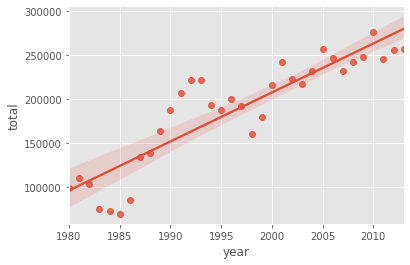

In [22]:
reg_plot = sns.regplot(x='year', 
                       y='total', 
                       data=df_t)

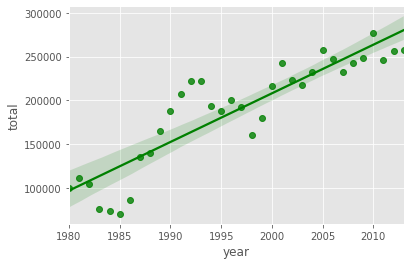

In [23]:
reg_plot = sns.regplot(x='year', 
                       y='total', 
                       data=df_t, 
                       color='green')
plt.show()

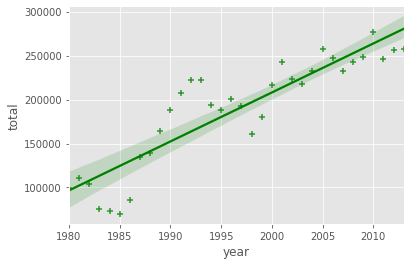

In [24]:
ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_t, 
                 color='green', 
                 marker='+')
plt.show()

Let's blow up the plot a little so that it is more appealing to the sight.


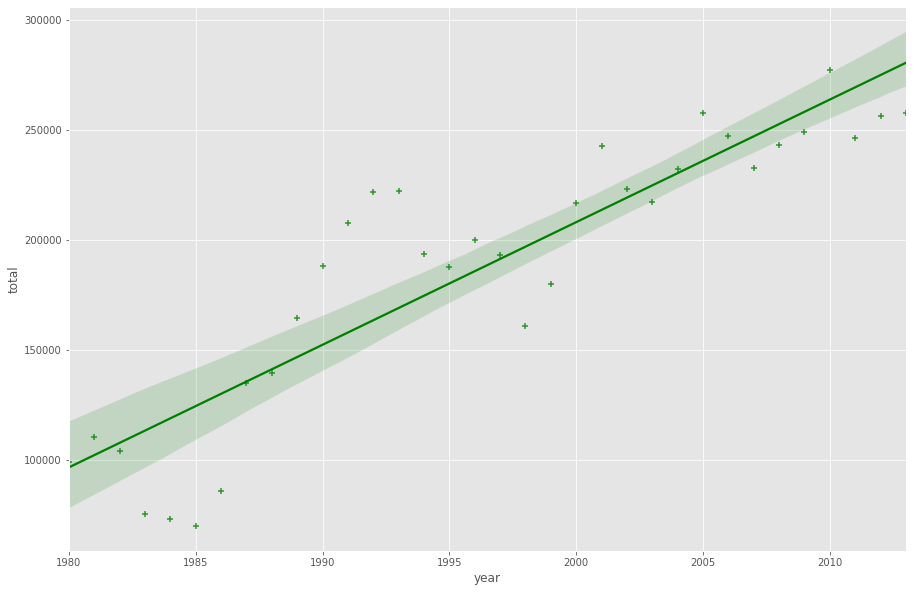

In [25]:
plt.figure(figsize=(15, 10))

sns.regplot(x='year', 
            y='total', 
            data=df_t, 
            color='green', 
            marker='+')

plt.show()

Increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


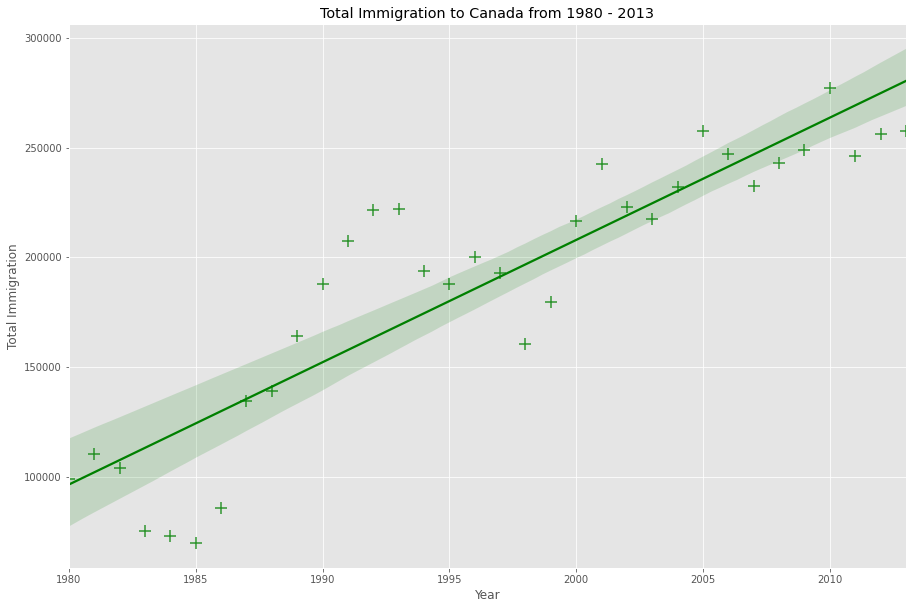

In [26]:
plt.figure(figsize=(15, 10))

ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_t, 
                 color='green', 
                 marker='+', 
                 scatter_kws={'s': 150}#size of the markers
                )


ax.set(xlabel='Year', 
       ylabel='Total Immigration'
      ) # add x- and y-labels

ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

plt.show()

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels.

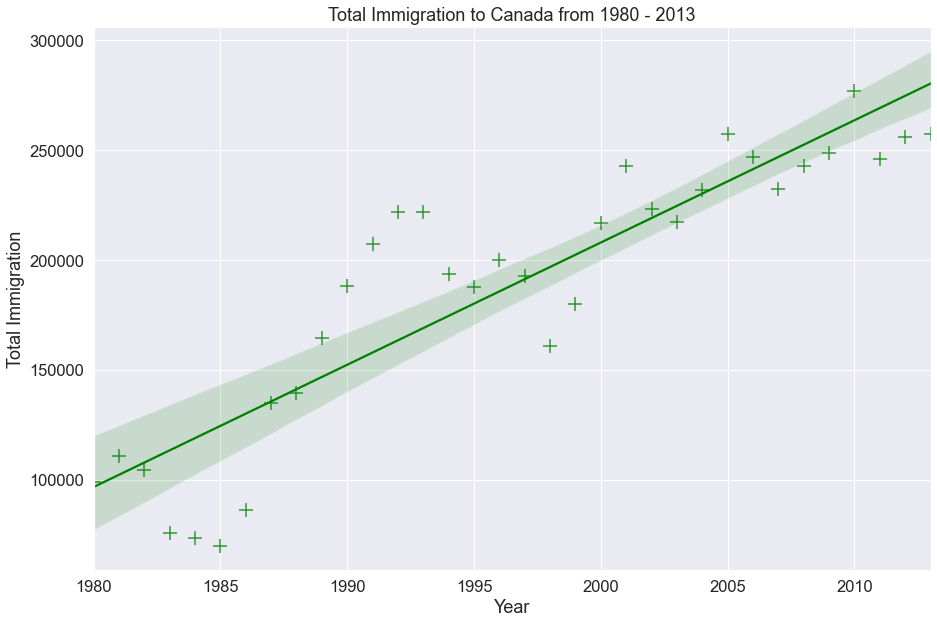

In [27]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_t, 
                 color='green', 
                 marker='+', 
                 scatter_kws={'s': 200})

ax.set(xlabel='Year', 
       ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Amazing! A complete scatter plot with a regression fit with 5 lines of code only. Isn't this really amazing?


Change the style to a white plain background.

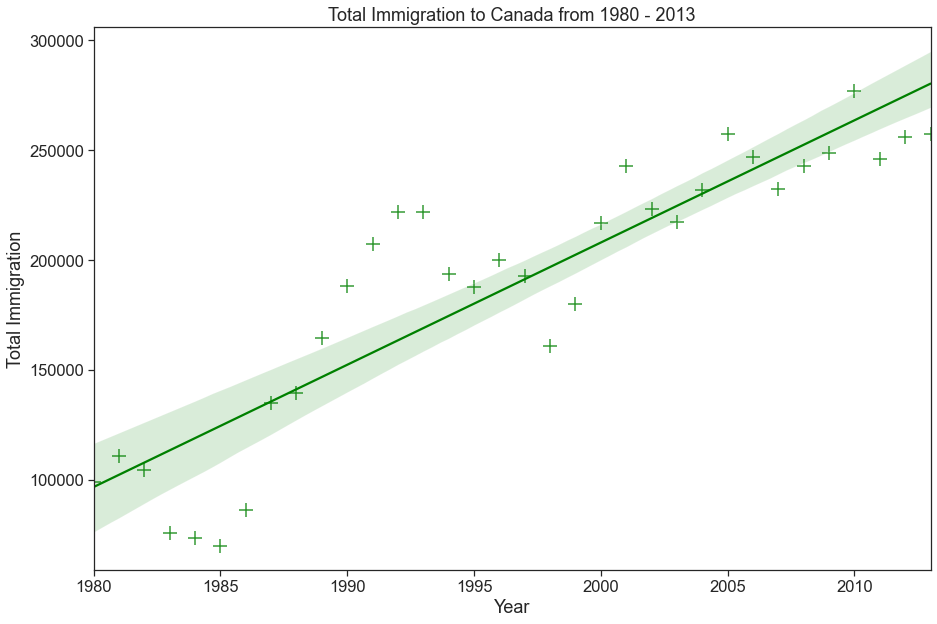

In [28]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_t, 
                 color='green', 
                 marker='+', 
                 scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Or to a white background with gridlines.


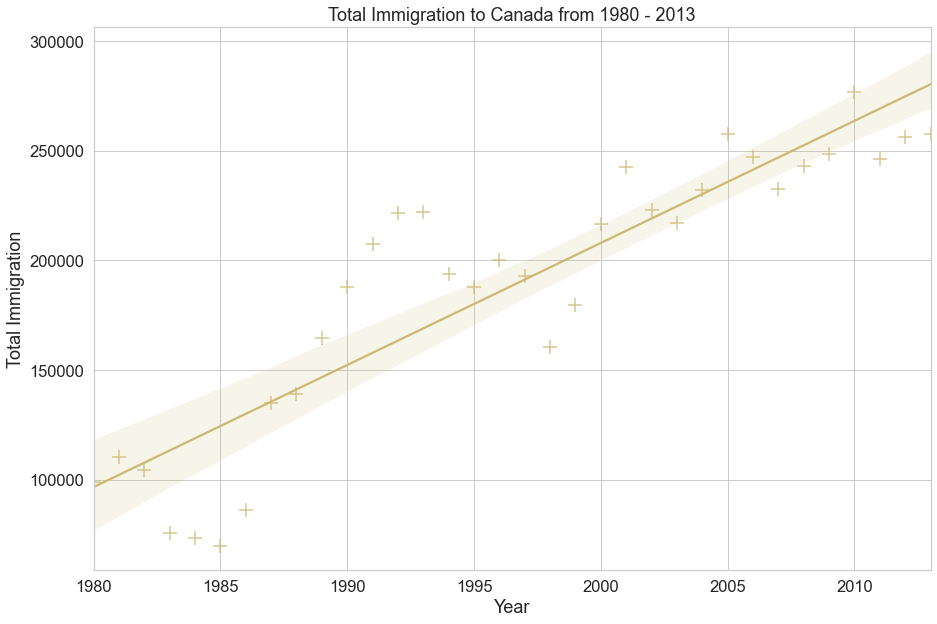

In [29]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_t, 
                 color='y', 
                 marker='+', 
                 scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [30]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,240943
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,64621
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,279490
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1883
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,1886


In [31]:
# create df_countries dataframe
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], 
                      years
                     ].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [32]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [33]:
# reset index in place
df_total.reset_index(inplace=True)
df_total.head()

,index,0
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [34]:
# rename columns
df_total.columns = ['year', 'total']
df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [35]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


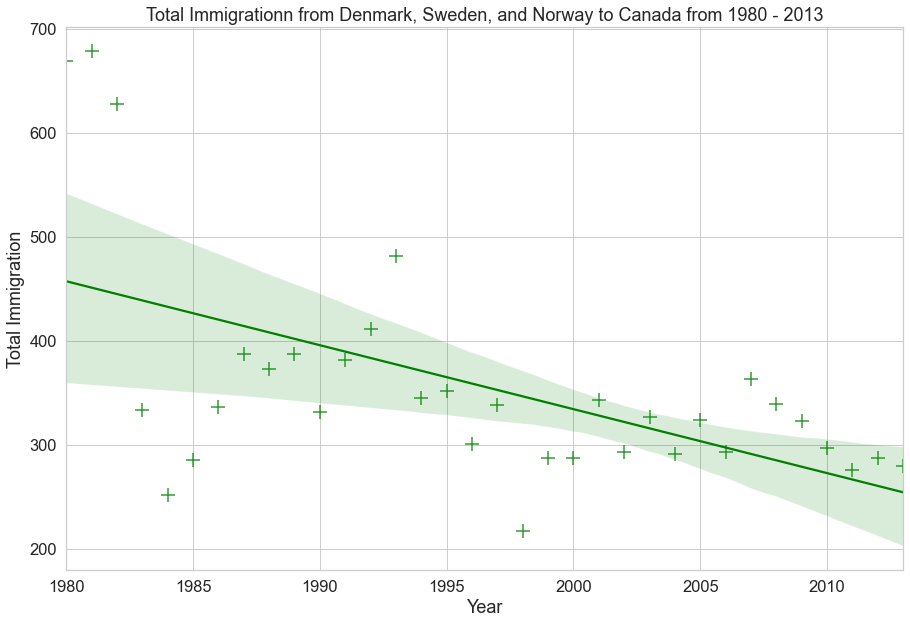

In [36]:
# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_total, 
                 color='green', 
                 marker='+', 
                 scatter_kws={'s': 200})

ax.set(xlabel='Year', 
       ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

plt.show()

In [37]:
df=pd.read_csv('datasets/headbrain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [38]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values
np.corrcoef(X, Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

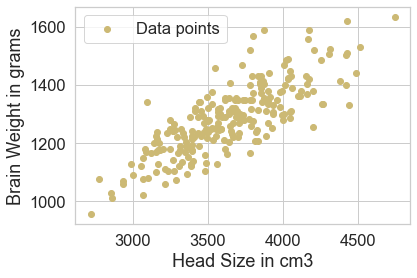

In [39]:
# Plot the Input Data
plt.scatter(X, Y, 
            c='y', 
            label='Data points')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')

plt.legend()
plt.show()

In [40]:
import statsmodels.api as sm

model = sm.OLS.from_formula("Y ~ X", data=df) # Y = b1*X + b0

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           5.96e-54
Time:                        16:02:48   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.000     232.701     418.446
X              0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Alternative 

using from sklearn import linear_model

In [43]:
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [45]:
from sklearn import linear_model

#building Linear regression model (LRM)

lm = linear_model.LinearRegression()

#Head Size(cm^3) = (Brain Weight(grams))*b1 + b0

X = pd.DataFrame(df['Head Size(cm^3)'])
Y = pd.DataFrame(df['Brain Weight(grams)'])

model_lm = lm.fit(X, Y)
model_lm

LinearRegression()

In [47]:
print('The intercept is \t :\t', model_lm.intercept_)
print('The coefficients are \t : \t', model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(X, Y))

The intercept is 	 :	 [325.57342105]
The coefficients are 	 : 	 [[0.26342934]]
Model score (R-squared) is : 	 0.639311719957


In [49]:
brain_weight = pd.DataFrame([200]) #height ? 
predict_HeadSize = model_lm.predict(brain_weight)

predict_HeadSize

array([[378.25928895]])

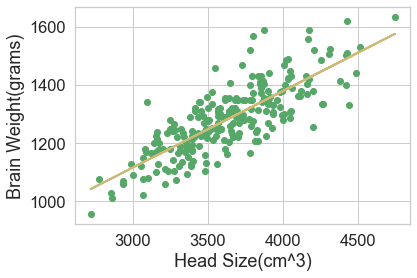

In [61]:
df.plot(kind='scatter', 
        x='Head Size(cm^3)', 
        y='Brain Weight(grams)',
       color ='r')

plt.plot(X, 
         model_lm.predict(X), 
         linewidth=2, 
        color = 'y')

plt.scatter(x = X,
            y = Y, 
           color = 'g')#the predictions

plt.show()